# Data Challenge of Personal Loan Convention

In [1]:
# print the result respectively in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
# import dataset and print the first 5 rows
df = pd.read_csv('Dataset.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis

In [4]:
# check the datatype, most of datatype are int, only one is float
# seems no null values, but not sure if it has any NaN values
# the shape of df is (5000, 14)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

<AxesSubplot:>

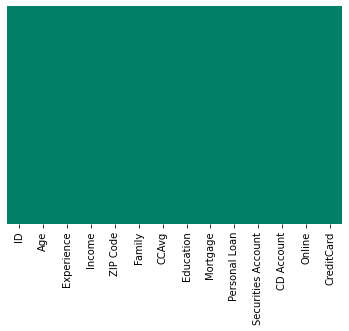

In [5]:
# no null values and NaN values for sure
# a heatmap for data visualizition
df.isnull().any()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='summer')

In [6]:
# statistical summary
# min of Experience is -3, Experience should not have negative numbers 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

[Text(0, 0, '3462'), Text(0, 0, '1538')]

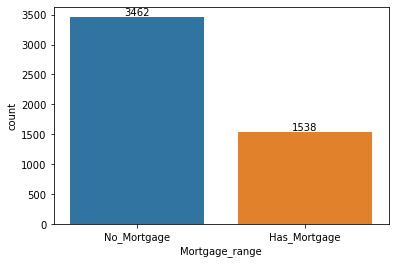

In [8]:
# Number of people with zero mortgage

Mortgage_range = pd.cut(df['Mortgage'],[-1,0,650], labels = ['No_Mortgage','Has_Mortgage'])
df['Mortgage_range'] = Mortgage_range
ax = sns.countplot(x='Mortgage_range', data=df)
ax.bar_label(ax.containers[0])

# drop the column afterward
df = df.drop(['Mortgage_range'], axis=1)

[Text(0, 0, '106'), Text(0, 0, '4894')]

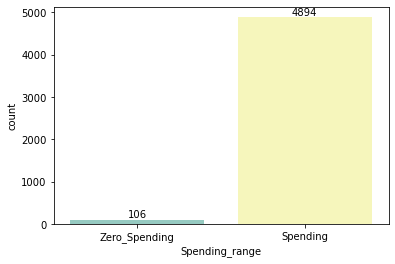

In [9]:
# Number of people with zero credit card spending per month
Spending_range = pd.cut(df['CCAvg'],[-1,0,10], labels = ['Zero_Spending','Spending'])
df['Spending_range'] = Spending_range
ax1 = sns.countplot(x='Spending_range', data=df, palette="Set3")
ax1.bar_label(ax1.containers[0])

# drop the column afterward
df = df.drop(['Spending_range'], axis=1)

In [10]:
# Value counts of all categorical columns.
# the num count of categorical columns is 8 
# since the ZIP Code is also a categorical variable, thus I move it to here. 
# remove the target variable 'Personal Loan'
categorical_columns = [col for col in df.columns if df[col].nunique() <= 5]
categorical_columns.append('ZIP Code')
categorical_columns.remove('Personal Loan')
categorical_columns
print('the num count of categorical columns is:',len(categorical_columns))

# categorical dataframe prepares for the below graph

categorical = df[['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code']]

['Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'ZIP Code']

the num count of categorical columns is: 7


In [11]:
# Value counts of all numerical columns.
# and the the num count of numerical columns is 6
# remove the ID which is meaningless
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]
numerical_columns.remove('ID')
numerical_columns.remove('ZIP Code')
numerical_columns
print('the num count of categorical columns is:',len(numerical_columns))

# numerical dataframe prepares for the below graph
numerical = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

the num count of categorical columns is: 5


## Univariate and Bivariate

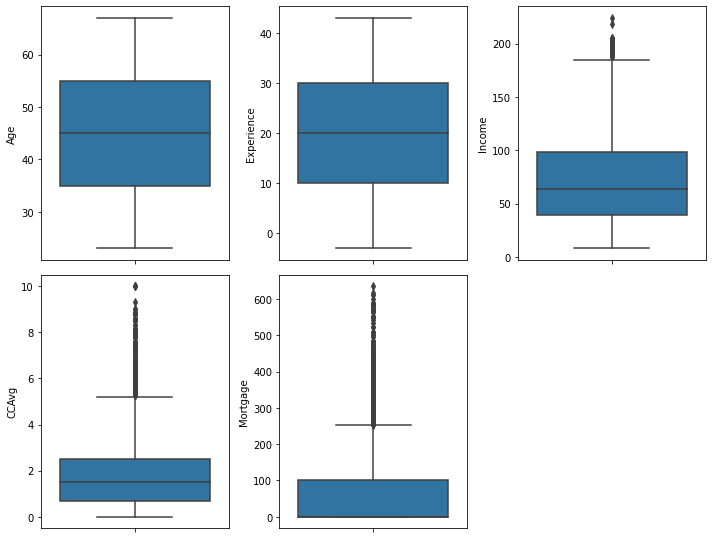

In [12]:
# Univariate analysis for numerical columns

fig = plt.figure(figsize=(10,15))
for i in range(len(numerical_columns)):
    fig.add_subplot(4, 3,i+1)
    sns.boxplot(y=numerical.iloc[:,i])

plt.tight_layout()
plt.show();

#### Observation
* kind of outliers shows in the Income, CCAvg, and Mortgage
* parts of outliers need to be removed 

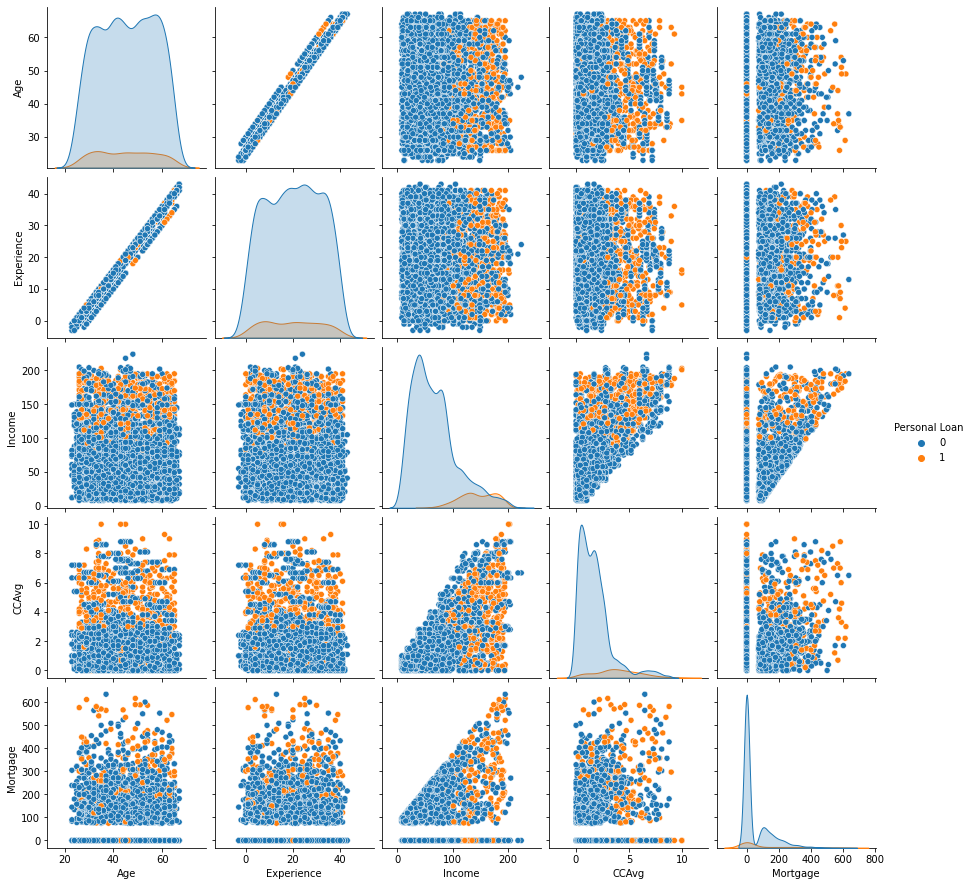

In [13]:
# Bivariate analysis for numerical columns

sns.pairplot(df,
    x_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
    y_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
             diag_kind="kde",hue="Personal Loan")
plt.show()

#### Observation
* Age and Experience look like highly correlated
* Age is conditionally independent because no matter what Age is, the more the income, CCAvg, Mortgage they have, the higher posibility they accepted the Personal Loan 
* it's make sense that the clients would not get large amount of mortgage and CCAvg id their income 

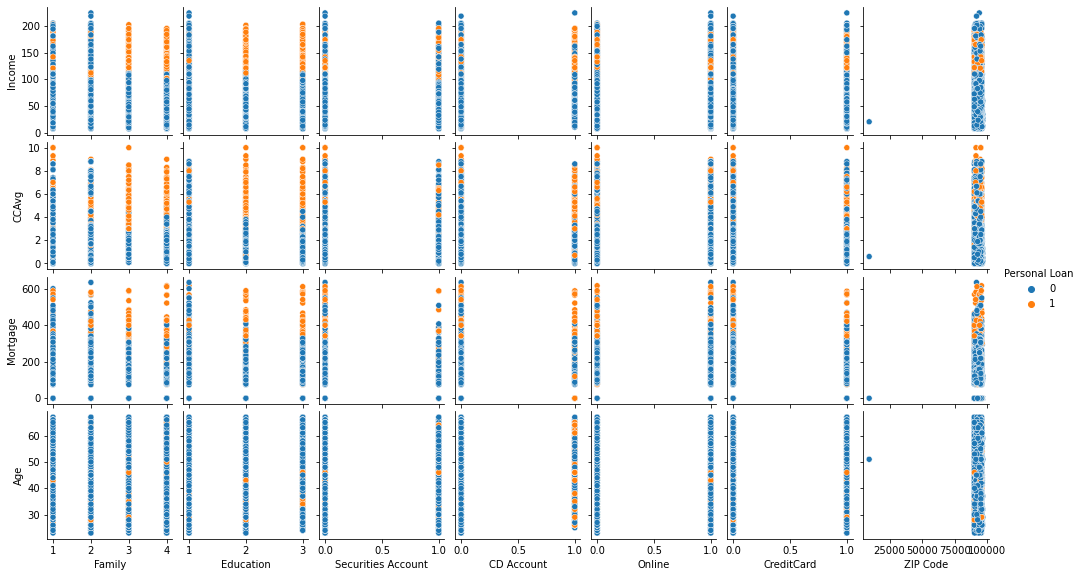

In [14]:
# Bivariate analysis for categorical columns

g = sns.pairplot(df,
    x_vars=['Family', 'Education', 'Securities Account', 'CD Account', 'Online',  'CreditCard', 'ZIP Code'],
    y_vars=['Income', 'CCAvg', 'Mortgage', 'Age'], 
            hue="Personal Loan")
g.fig.set_size_inches(15,8)
plt.show();

#### Observation
* family size, educational level, and CD Account have a relatively big impact on whether or not accept the personal loan
* try to remove the outlier of ZIP Code to see the distribution in details

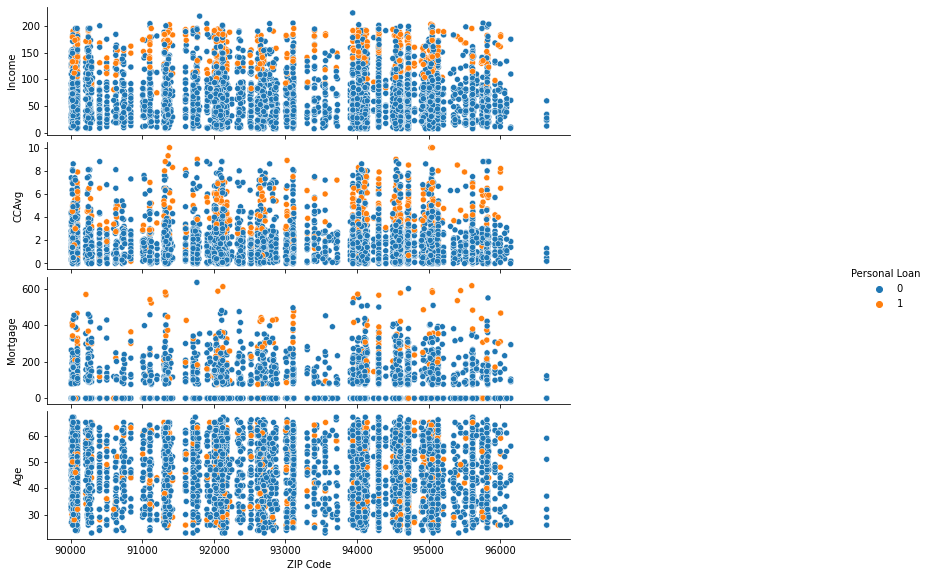

In [15]:
# remove the outlier of ZIP Code
df = df.drop(df[df['ZIP Code'] < 50000].index)

# Bivariate analysis for ZIP Code
g = sns.pairplot(df,
    x_vars=['ZIP Code'],
    y_vars=['Income', 'CCAvg', 'Mortgage', 'Age'], 
            hue="Personal Loan")
g.fig.set_size_inches(15,8)
plt.show();

In [22]:
a = df.groupby(['ZIP Code', 'Personal Loan']).size()
a.nlargest(10)

ZIP Code  Personal Loan
94720     0                150
94305     0                114
95616     0                110
90095     0                 63
93106     0                 53
91320     0                 51
93943     0                 50
90024     0                 49
92037     0                 49
91711     0                 48
dtype: int64

In [23]:
b = df.groupby(['ZIP Code']).size()
b.nlargest(10)

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
dtype: int64

In [32]:
c = df.groupby(['ZIP Code', 'Personal Loan']).size().groupby(level=1)
c.nlargest(10)

Personal Loan  ZIP Code  Personal Loan
0              94720     0                150
               94305     0                114
               95616     0                110
               90095     0                 63
               93106     0                 53
               91320     0                 51
               93943     0                 50
               90024     0                 49
               92037     0                 49
               91711     0                 48
1              94720     1                 19
               94305     1                 13
               92093     1                  9
               90089     1                  8
               90095     1                  8
               94304     1                  8
               92182     1                  7
               94022     1                  6
               95051     1                  6
               95616     1                  6
dtype: int64

#### Observation
* the distribution of ZIP Code seems pretty diversified
* to divide them as 7 groups

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'High Correlation')

<AxesSubplot:title={'center':'High Correlation'}>

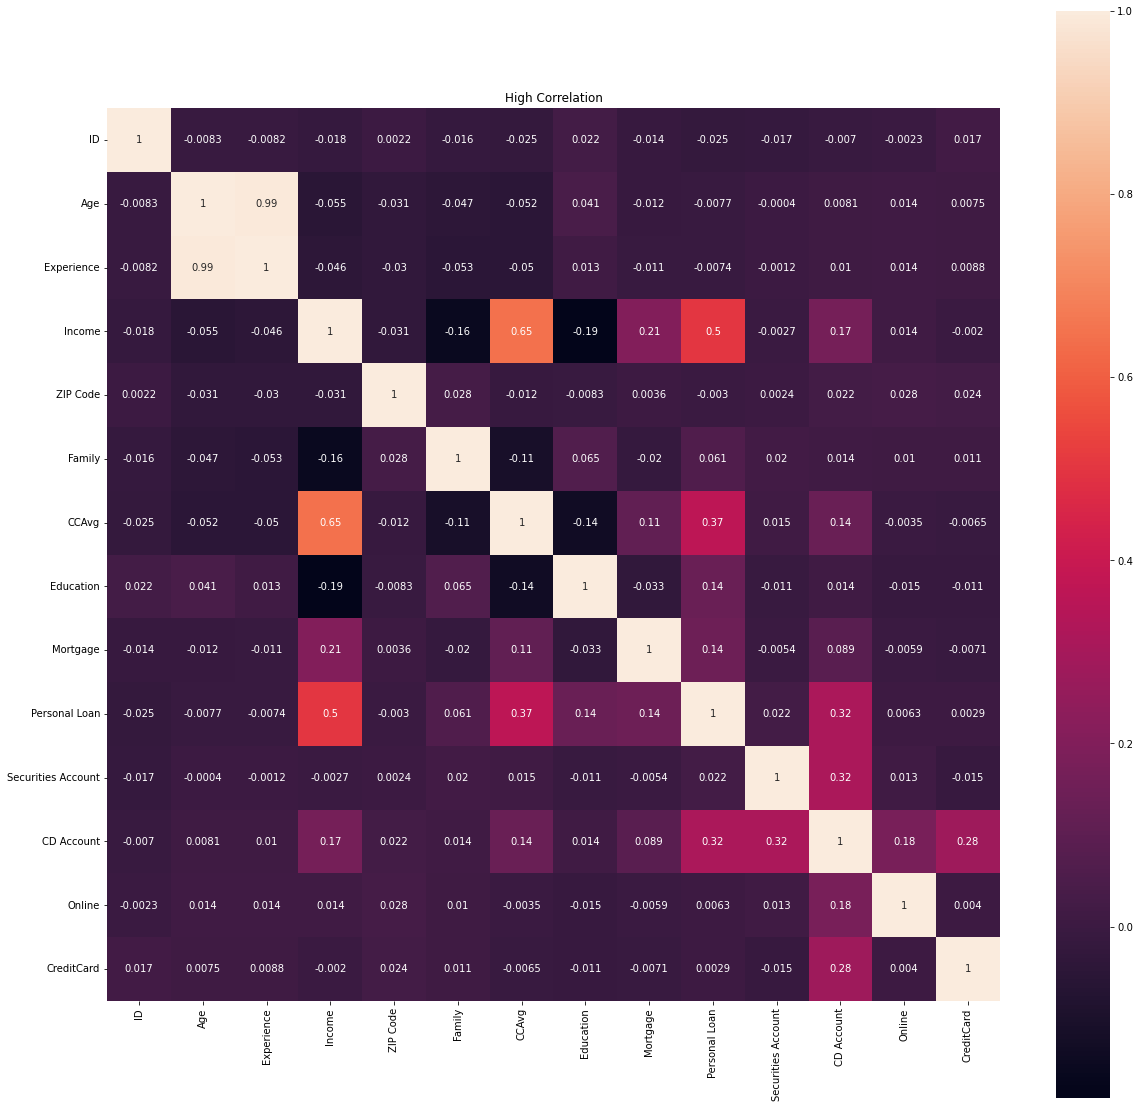

In [16]:
# coefficient correlation headmap

plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(df.corr(), annot=True, square=True)

#### Observation
* Age and Experience are highly correlated for sure
* remove Experience for sure as Experience has negative values need to be handled

## Data Cleaning

In [17]:
# remove some outliers of Income, CCAvg, and Mortgage
df = df.drop(df[df['Income'] >= 210].index)
df = df.drop(df[df['CCAvg'] >= 10].index)
df = df.drop(df[df['Mortgage'] >= 600].index)

In [36]:
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase()

zcdb[92182]

ZipCode(zip='92182', city='San Diego', state='CA', longitude=-117.076176, latitude=32.775088, timezone=-8, dst=1)

In [38]:
zcdb[95929].city

'Chico'

In [18]:
# assign 7 groups into ZIP Code
zipset = pd.cut(df['ZIP Code'],[90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000], labels = [0, 1, 2, 3, 4, 5, 6])
df['zipset'] = zipset

In [19]:
# seperate the target variavle and independent variables
# and drop some useless columns
df_y = df['Personal Loan']
df.drop(['ZIP Code', 'ID', 'Experience', 'Personal Loan'], axis = 1, inplace = True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,zipset
0,25,49,4,1.6,1,0,1,0,0,0,1
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,4
3,35,100,1,2.7,2,0,0,0,0,0,4
4,35,45,4,1.0,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0,2
4996,30,15,4,0.4,1,85,0,0,1,0,2
4997,63,24,2,0.3,3,0,0,0,0,0,3
4998,65,49,3,0.5,2,0,0,0,1,0,0


## Data Modeling

In [20]:
# seperate the X and Y dataset
X = df
y = df_y

In [22]:
# split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [24]:
# lbfgs is an optimal algorithm and (solver='lbfgs', max_iter=1000) just for avoiding to exceed the maximum iteration 
logmodel = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

# model fitting
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# get the classification report
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

# 
print('Accuracy of the train dataset: {:.2f}'.format(logmodel.score(X_train, y_train)))
print('Accuracy of the test dataset: {:.2f}'.format(logmodel.score(X_test, y_test)))

NameError: name 'logmodel' is not defined

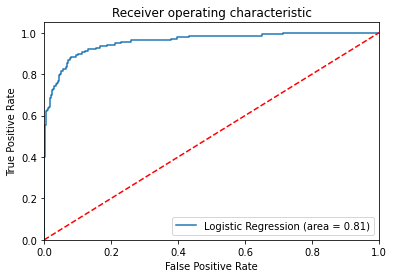

In [27]:
# plot the receiver operating characteristic (ROC) curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show();

In [30]:
# 
features = list(df.iloc[:, 0:].columns)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary(xname=features))

Optimization terminated successfully.
         Current function value: 0.211254
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 4990
Model:                          Logit   Df Residuals:                     4979
Method:                           MLE   Df Model:                           10
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                  0.3280
Time:                        18:59:15   Log-Likelihood:                -1054.2
converged:                       True   LL-Null:                       -1568.8
Covariance Type:            nonrobust   LLR p-value:                9.346e-215
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0921      0.005    -20.117      0.000      -0.101      -0.083
Incom

<AxesSubplot:>

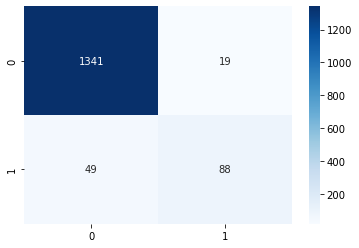

In [31]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='', cmap='Blues')

In [ ]:
y_predictions = pd.DataFrame(predictions)
y_predictions

In [ ]:
df_out = X_test.reset_index()
df_out["Actual"] = y_test.reset_index()["Personal Loan"]
df_out["Prediction"] = y_predictions.reset_index()[0]

In [ ]:
df_out.head()

In [ ]:
df_index = df_out.loc[df_out['Actual'] != df_out['Prediction']]

df_index
